In [1]:
# ------- PARAMETERS ------- # 

root = '/pnfs/pic.es/data/cta/LST/LST3/Data/ZFITS/'

runBackground = 60  # run of pedestal background that will be used to obtain the baseline of the pedestals

# -------------------------- #

# other parameters
dir_output = 'file_output_LST3/'
dir_graphs = 'graphs/'
minNumData =  800 # if in some pixel we have less, not taken into account in order to have some statistics


In [2]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os
from ctapipe.instrument    import CameraGeometry
from ctapipe.visualization import CameraDisplay
from ctapipe.coordinates   import EngineeringCameraFrame
from traitlets.config      import Config
from ctapipe.io            import EventSource

import createCSV as csv
import auxiliar  as aux
aux.parameters()

# extracting the number of LST
LST_camera = aux.find_LST_num(root) 

# extracting geometry
date, subruns = aux.search(root,runBackground)    
config = Config(
    {'LSTEventSource': {'default_trigger_type': 'ucts','allowed_tels': [1],'min_flatfield_adc': 3000,
                        'min_flatfield_pixel_fraction': 0.8,},})  

path     = root+date+'/'+'LST-'+LST_camera+'.1.Run'+str(runBackground).zfill(5)+'.'+str(0).zfill(4)+'.fits.fz'
source   = EventSource(input_url=path, config=config)
camgeom1 = source.subarray.tel[1].camera.geometry
LSTgeom  = camgeom1.transform_to(EngineeringCameraFrame())

# geometry of CaCo 
camgeom2 = CameraGeometry.from_name("LSTCam")

# creating the folder if dont exist
aux.create_folder(dir_output)
aux.create_folder(dir_graphs)

## Read neighbors and values from the `.txt` files

In [3]:
N_neighbor   = []
NN_neighbor  = []
MaxAmplitude = [[] for px in range(1855)]

for pixel in range(1855):
    
    if (pixel % 160 == 0) or (pixel == 0):
        print('Reading Pixels ' + str(int(100 * pixel / 1855)) + '%...')
        
    filename = dir_output + 'Pixel' + str(pixel).zfill(4) + '.txt'

    with open(filename) as file:
        lines = file.readlines()

    lines = [lines[i].replace('\n', '') for i in range(len(lines))]
    
    it1, it2 = range(len(lines[1].split(','))), range(len(lines[3].split(',')))
    N_neighbor.append(           [int(lines[1].replace('[','').replace(']','').split(',')[i]) for i in it1])
    NN_neighbor.append([pixel] + [int(lines[3].replace('[','').replace(']','').split(',')[i]) for i in it2])
 
    lines = lines[4:]
    if lines != []:
        
        for l in range(len(lines)):
            
            it3   = range(len(lines[l].split(',')))
            array = [int(lines[l].replace('[','').replace(']','').split(',')[i]) for i in it3]
            MaxAmplitude[pixel].append(array)
            
print('Reading pixels 100%')            

Reading Pixels 0%...
Reading Pixels 8%...
Reading Pixels 17%...
Reading Pixels 25%...
Reading Pixels 34%...
Reading Pixels 43%...
Reading Pixels 51%...
Reading Pixels 60%...
Reading Pixels 69%...
Reading Pixels 77%...
Reading Pixels 86%...
Reading Pixels 94%...
Reading pixels 100%


Print the data we obtained

In [4]:
print('Pixel\t#Ev\tMaxAmplitud')

for px in range(1855):
    if (px % 10 == 0) or (px == 0):
        print('\n')
        
    maxs     = [max(MaxAmplitude[px][i]) for i in range(len(MaxAmplitude[px])) if MaxAmplitude[px][i] != []]
    maximum  = '--'
    if maxs != []:
        maximum = max(maxs)
    
    print(str(px) + '\t' + str(len(MaxAmplitude[px])) + '\t' + str(maximum))

Pixel	#Ev	MaxAmplitud


0	0	--
1	0	--
2	0	--
3	0	--
4	0	--
5	0	--
6	0	--
7	0	--
8	0	--
9	0	--


10	0	--
11	0	--
12	0	--
13	0	--
14	0	--
15	0	--
16	0	--
17	0	--
18	0	--
19	0	--


20	0	--
21	0	--
22	0	--
23	0	--
24	0	--
25	0	--
26	0	--
27	0	--
28	0	--
29	0	--


30	0	--
31	0	--
32	0	--
33	0	--
34	0	--
35	0	--
36	0	--
37	0	--
38	0	--
39	0	--


40	0	--
41	0	--
42	0	--
43	0	--
44	0	--
45	0	--
46	0	--
47	0	--
48	0	--
49	0	--


50	0	--
51	0	--
52	0	--
53	0	--
54	0	--
55	0	--
56	0	--
57	0	--
58	0	--
59	0	--


60	0	--
61	0	--
62	0	--
63	0	--
64	0	--
65	0	--
66	0	--
67	0	--
68	0	--
69	0	--


70	0	--
71	0	--
72	0	--
73	0	--
74	0	--
75	0	--
76	0	--
77	0	--
78	0	--
79	0	--


80	0	--
81	0	--
82	0	--
83	0	--
84	0	--
85	0	--
86	0	--
87	0	--
88	0	--
89	0	--


90	0	--
91	0	--
92	0	--
93	0	--
94	0	--
95	0	--
96	0	--
97	0	--
98	0	--
99	0	--


100	0	--
101	0	--
102	0	--
103	0	--
104	0	--
105	0	--
106	0	--
107	0	--
108	0	--
109	0	--


110	0	--
111	0	--
112	0	--
113	0	--
114	0	--
115	0	--
116	0	--
117	0	--
11

899	10570	4373


900	11269	4409
901	11251	4403
902	10927	4377
903	10258	4301
904	10689	4356
905	11064	4276
906	10672	4399
907	10691	4325
908	10881	4350
909	10952	4404


910	11152	4265
911	10111	4338
912	10693	4267
913	0	--
914	14	1503
915	0	--
916	0	--
917	0	--
918	0	--
919	0	--


920	0	--
921	10737	4402
922	10170	4374
923	0	--
924	0	--
925	0	--
926	0	--
927	0	--
928	0	--
929	0	--


930	0	--
931	0	--
932	0	--
933	0	--
934	0	--
935	0	--
936	0	--
937	0	--
938	0	--
939	0	--


940	0	--
941	0	--
942	0	--
943	0	--
944	0	--
945	0	--
946	0	--
947	0	--
948	0	--
949	0	--


950	0	--
951	0	--
952	0	--
953	0	--
954	0	--
955	0	--
956	0	--
957	0	--
958	0	--
959	0	--


960	0	--
961	0	--
962	0	--
963	0	--
964	0	--
965	0	--
966	0	--
967	0	--
968	0	--
969	0	--


970	0	--
971	0	--
972	0	--
973	0	--
974	0	--
975	0	--
976	0	--
977	0	--
978	0	--
979	0	--


980	0	--
981	0	--
982	0	--
983	0	--
984	0	--
985	0	--
986	0	--
987	0	--
988	0	--
989	0	--


990	0	--
991	0	--
992	0	--
993	0	--
994	0	--
995	0	--
996	0	--

1625	10680	4294
1626	0	--
1627	0	--
1628	10303	4392
1629	10778	4298


1630	0	--
1631	0	--
1632	0	--
1633	0	--
1634	0	--
1635	0	--
1636	0	--
1637	2	1042
1638	0	--
1639	0	--


1640	0	--
1641	0	--
1642	0	--
1643	0	--
1644	0	--
1645	0	--
1646	0	--
1647	0	--
1648	0	--
1649	0	--


1650	0	--
1651	0	--
1652	0	--
1653	0	--
1654	0	--
1655	0	--
1656	0	--
1657	0	--
1658	0	--
1659	0	--


1660	0	--
1661	0	--
1662	0	--
1663	0	--
1664	0	--
1665	0	--
1666	0	--
1667	0	--
1668	0	--
1669	0	--


1670	0	--
1671	0	--
1672	0	--
1673	0	--
1674	0	--
1675	0	--
1676	0	--
1677	0	--
1678	0	--
1679	0	--


1680	0	--
1681	0	--
1682	0	--
1683	0	--
1684	0	--
1685	0	--
1686	0	--
1687	0	--
1688	0	--
1689	0	--


1690	0	--
1691	0	--
1692	0	--
1693	0	--
1694	0	--
1695	0	--
1696	0	--
1697	0	--
1698	0	--
1699	0	--


1700	0	--
1701	0	--
1702	0	--
1703	0	--
1704	11048	4331
1705	10985	4345
1706	0	--
1707	3	1102
1708	0	--
1709	17612	4322


1710	11042	4315
1711	17949	4337
1712	18966	4366
1713	18264	4292
1714	16988	4346
1715	18496	4

### Calculating the pedestal of pixels in a run withut flashes

In [7]:
# first we need to create the file from the background run input
# checking if the file already exists
path  = dir_output + 'data_Run' + str(runBackground) + '_Subrun' + str(0) + '.csv'

if os.path.exists(path) == False:
    # if dont exist we create the file
    print('Creating CSV file of the background run, will take a few minutes ...\n')
    
    csv.create(runBackground, root, dir_output)

    
# mean values extraction
print('\nReading CSV...')
df  = pd.read_csv(path)

pedestal = []

for i in range(1855): 
    pedestal.append(df.iloc[:, i * 2 + 1])

del df  # deleting to clean memory
print('Finished\n')

# mean of the pedestals for each pixel
print('Calculating means...\n')
TOTALMEAN  = [np.mean(pedestal[px]) for px in range(1855)]

# calculate neighbors of cluster
C_neighbor = aux.neighborClusterPrint(camgeom1, camgeom2)


Reading CSV...
Finished

Calculating means...

Calculating neighbors of cluster...



In [8]:
# calculating mean values for each pixel and each neighbor - NN case
print('Calculating the NextNeighbors cases\n')
MeanAmplitudesNN = []

for px in range(1855):    
    
    MeanAmplitudestmp = []
    if len(MaxAmplitude[px]) > minNumData:
        
        matrix = np.transpose(MaxAmplitude[px])
        for nei in range(len(NN_neighbor[px])):
                MeanAmplitudestmp.append(np.mean(matrix[nei]))

    MeanAmplitudesNN.append(MeanAmplitudestmp)    
    
errorNN = []
for px in range(len(MeanAmplitudesNN)):
    
    for nei in range(len(MeanAmplitudesNN[px])):
        if (nei != 0) and (NN_neighbor[px][nei] not in N_neighbor[px]):
            
            errNum = (MeanAmplitudesNN[px][nei] - TOTALMEAN[NN_neighbor[px][nei]])
            errDen = (MeanAmplitudesNN[px][0]   - TOTALMEAN[px])
            errorNN.append(abs(100 * errNum / errDen))

                
# calculating mean values for each pixel and each neighbor - N case
MeanAmplitudesN = [] 
print('Calculating the Neighbors cases\n')
for px in range(1855):    
    
    MeanAmplitudestmp = []
    if len(MaxAmplitude[px]) > minNumData:
        
        matrix = np.transpose(MaxAmplitude[px])
        for nei in range(len(NN_neighbor[px])):
            
            if (NN_neighbor[px][nei] in N_neighbor[px]) or (nei == 0):
                MeanAmplitudestmp.append(np.mean(matrix[nei]))

    MeanAmplitudesN.append(MeanAmplitudestmp)    
    
errorN = []
for px in range(len(MeanAmplitudesN)):
    
    for nei in range(len(MeanAmplitudesN[px])):
        if (nei != 0):
            
            errNum = (MeanAmplitudesN[px][nei] - TOTALMEAN[N_neighbor[px][nei-1]])
            errDen = (MeanAmplitudesN[px][0]   - TOTALMEAN[px])
            errorN.append(abs(100 * errNum / errDen))

# calculating mean values for each pixel and each neighbor - Cluster case
MeanAmplitudesC = []
print('Calculating the Cluster neighbor cases...\n')
for px in range(1855):    
    
    MeanAmplitudestmp = []
    if len(MaxAmplitude[px]) > minNumData:
        
        matrix = np.transpose(MaxAmplitude[px])
        for nei in range(len(NN_neighbor[px])):
            
            if (NN_neighbor[px][nei] in C_neighbor[px]) or (nei == 0):
                MeanAmplitudestmp.append(np.mean(matrix[nei]))

    MeanAmplitudesC.append(MeanAmplitudestmp)    
    
errorC = []
for px in range(len(MeanAmplitudesC)):
    
    for nei in range(len(MeanAmplitudesC[px])):
        if nei != 0:
            
            errNum = (MeanAmplitudesC[px][nei] - TOTALMEAN[C_neighbor[px][nei-1]])
            errDen = (MeanAmplitudesC[px][0]   - TOTALMEAN[px])
            errorC.append(abs(100 * errNum / errDen))


Calculating the NextNeighbors cases

Calculating the Neighbors cases

Calculating the Cluster neighbor cases...



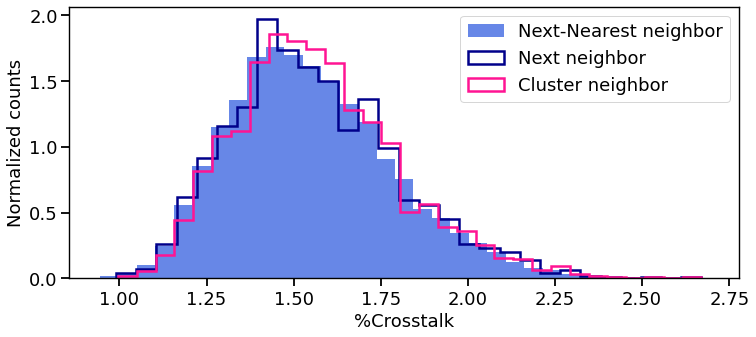

In [9]:
fig,ax = plt.subplots(figsize=(12,5))       

l1, h1 = 'Next-Nearest neighbor', 'stepfilled'
l2, h2 = 'Next neighbor'        , 'step'
l3, h3 = 'Cluster neighbor'     , 'step'

ax.hist(errorNN, bins=33, density=True, alpha=0.8, histtype=h1, lw=2.5, color='royalblue', label=l1, zorder=0)
ax.hist(errorN , bins=29, density=True, alpha=1,   histtype=h2, lw=2.5, color='darkblue' , label=l2          )
ax.hist(errorC , bins=31, density=True, alpha=1,   histtype=h3, lw=2.5, color='deeppink' , label=l3          )

ax.legend()
ax.set_xlabel('%Crosstalk')
ax.set_ylabel('Normalized counts')

plt.savefig(dir_graphs + 'crosstalk_hist.pdf', format='pdf', bbox_inches='tight')  

plt.show()

Camera example of neighbors distribution

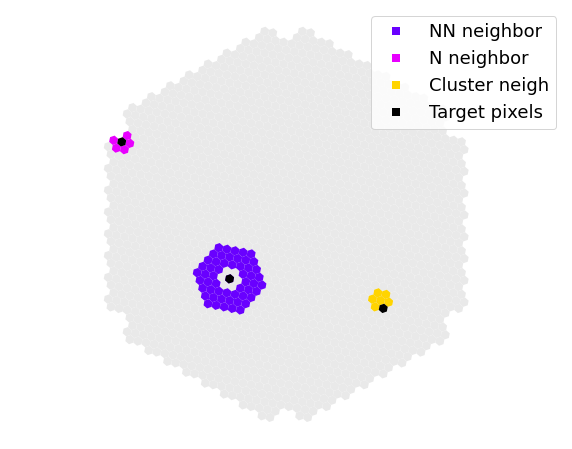

In [10]:
# empty arrays
data   = [0 for i in range(1855)]
dataNN = [0 for i in range(1855)]
dataN  = [0 for i in range(1855)]
dataC  = [0 for i in range(1855)]
dataPX = [0 for i in range(1855)]

pixel         = 300
dataPX[pixel] = 1

for index in NN_neighbor[pixel]:
    if index not in N_neighbor[pixel]:
        dataNN[index] = 1

pixel         = 1750
dataPX[pixel] = 1

for i in N_neighbor[pixel]:
    dataN[i] = 1

pixel         = 1000
dataPX[pixel] = 1

for i in C_neighbor[pixel]:
    dataC[i] = 1

fig, ax = plt.subplots(figsize=(10, 8))
camgeom = source.subarray.tel[1].camera.geometry

cmap0      = colors.LinearSegmentedColormap.from_list("", ["#e9e9e9", "#e9e9e9"])
camdisplay = CameraDisplay(LSTgeom, ax=ax, image=data, show_frame=False, cmap=cmap0, title='') 

cmap_o = np.zeros([256, 4])
cmap_o[:, 3] = np.linspace(0, 1,    256)
cmap_o[:, 2] = np.linspace(0, 1,    256)
cmap_o[:, 1] = np.linspace(0, 0,    256)
cmap_o[:, 0] = np.linspace(0, 0.41, 256)
cmap_o       = colors.ListedColormap(cmap_o)
camdisplay   = CameraDisplay(LSTgeom, ax=ax, image=dataNN, show_frame=False, cmap=cmap_o, title='') 
plt.plot([], [], 's', color=(0.41, 0, 1), label='NN neighbor')

cmap_o = np.zeros([256, 4])
cmap_o[:, 3] = np.linspace(0, 1,    256)
cmap_o[:, 2] = np.linspace(0, 1,    256)
cmap_o[:, 1] = np.linspace(0, 0,    256)
cmap_o[:, 0] = np.linspace(0, 0.91, 256)
cmap_o     = colors.ListedColormap(cmap_o)
camdisplay = CameraDisplay(LSTgeom, ax=ax, image=dataN, show_frame=False, cmap=cmap_o, title='') 
plt.plot([], [], 's', color=(0.91, 0, 1), label='N neighbor')

cmap_o = np.zeros([256, 4])
cmap_o[:, 3] = np.linspace(0, 1,    256)
cmap_o[:, 2] = np.linspace(0, 0,    256)
cmap_o[:, 1] = np.linspace(0, 0.83, 256)
cmap_o[:, 0] = np.linspace(0, 1,    256)
cmap_o     = colors.ListedColormap(cmap_o)
camdisplay = CameraDisplay(LSTgeom, ax=ax, image=dataC, show_frame=False, cmap=cmap_o, title='') 
plt.plot([], [], 's', color=(1, 0.83, 0), label='Cluster neigh')

cmap_k = np.zeros([256, 4])
cmap_k[:, 3] = np.linspace(0, 1, 256)
cmap_k[:, 2] = np.linspace(0, 0, 256)
cmap_k[:, 1] = np.linspace(0, 0, 256)
cmap_k[:, 0] = np.linspace(0, 0, 256)
cmap_k     = colors.ListedColormap(cmap_k)
camdisplay = CameraDisplay(LSTgeom, ax=ax, image=dataPX, show_frame=False, cmap=cmap_k, title='') 
plt.plot([], [], 's', color=(0, 0, 0), label='Target pixels')

ax.set_axis_off()
ax.legend()

plt.savefig(dir_graphs + 'example_neighbors.pdf', format='pdf', bbox_inches='tight')  
plt.show()